In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
#from ImageDataset import ImageDataset
from image_dataset import ImageDataset

# Set the path to the folder containing your unlabeled images
train_path = "data/DIV2K/train_HR"
test_path = "data/DIV2K/valid_HR"

# Define the transformation to be applied to each image
transform = transforms.Compose([
    #transforms.Resize((256, 256)),  # Resize the image to a fixed size
    transforms.RandomCrop((512,512)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()  # Convert the image to a tensor
])

# Create the ImageFolder dataset
train_data = ImageDataset(train_path, transform=transform)

test_data = ImageDataset(test_path, transform=transform)

In [2]:
from torch.utils.data import DataLoader
train_data_loader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_data_loader = DataLoader(dataset=test_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

In [3]:
#img, label = train_data[0][0], train_data[0][1]
img = train_data[0]
#class_names = train_data.classes
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
#print(f"Image label: {label}")
#print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.7490, 0.7373, 0.7137,  ..., 0.0980, 0.1059, 0.1098],
         [0.7882, 0.7333, 0.7059,  ..., 0.1020, 0.1059, 0.1137],
         [0.7961, 0.7490, 0.7137,  ..., 0.1059, 0.1098, 0.1137],
         ...,
         [0.1882, 0.2157, 0.1922,  ..., 0.5059, 0.5412, 0.5412],
         [0.2039, 0.2235, 0.2706,  ..., 0.4706, 0.5529, 0.5294],
         [0.2196, 0.2745, 0.3412,  ..., 0.4353, 0.5294, 0.5216]],

        [[0.3490, 0.3412, 0.3176,  ..., 0.0706, 0.0824, 0.0745],
         [0.3843, 0.3333, 0.3020,  ..., 0.0706, 0.0784, 0.0784],
         [0.3922, 0.3412, 0.3059,  ..., 0.0784, 0.0824, 0.0863],
         ...,
         [0.1333, 0.1451, 0.1216,  ..., 0.4471, 0.5020, 0.5020],
         [0.1412, 0.1529, 0.2039,  ..., 0.3765, 0.4824, 0.4784],
         [0.1529, 0.2078, 0.2863,  ..., 0.3137, 0.4039, 0.4549]],

        [[0.5255, 0.5098, 0.4824,  ..., 0.0196, 0.0314, 0.0392],
         [0.5922, 0.5373, 0.5020,  ..., 0.0353, 0.0353, 0.0549],
         [0.5961, 0.5451, 0.4902,  ..., 0.05

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

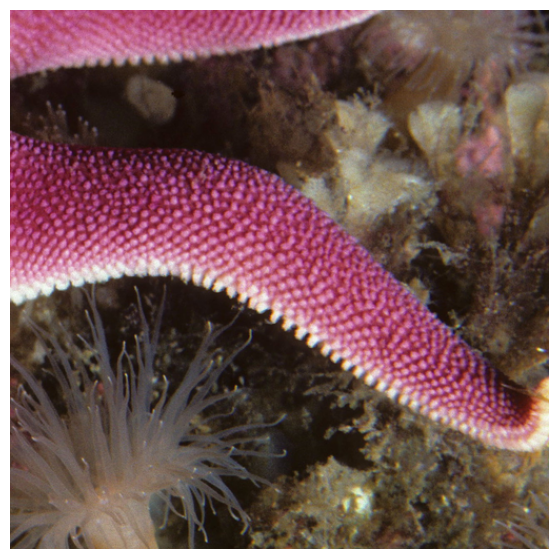

In [4]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
#plt.title(class_names[label], fontsize=14)

In [5]:
next(iter(train_data_loader)).shape

torch.Size([8, 3, 512, 512])

In [6]:
from pathlib import Path
# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "my_upscale_v3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [7]:
from autoencoder_upscale_model import AutoencoderUpscaleModel
import torch
from my_upscale_model import UpscaleModel
from train_autoencoder import downsample_image

device = "cpu"

batch = next(iter(test_data_loader))

model = UpscaleModel()

model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

model.to(device)

img = downsample_image(batch, 4)
model.eval()
with torch.inference_mode():
    result = model(img.to(device))



Original shape: torch.Size([3, 256, 256]) -> [color_channels, height, width]
Image permute shape: torch.Size([256, 256, 3]) -> [height, width, color_channels]


(-0.5, 255.5, 255.5, -0.5)

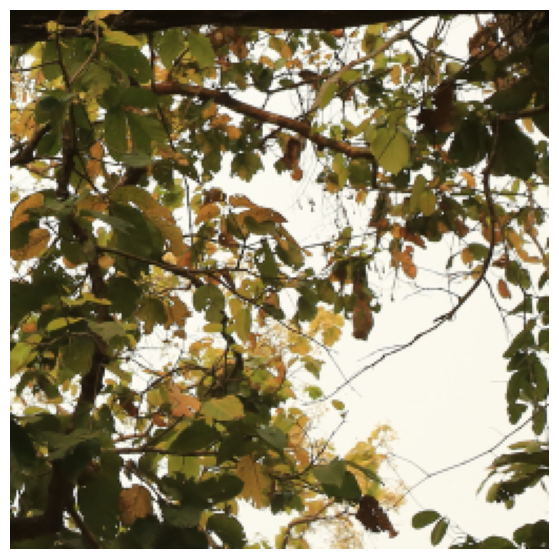

In [8]:
img = downsample_image(batch)[1]
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [9]:
img

tensor([[[0.0657, 0.0657, 0.0647,  ..., 0.0873, 0.0696, 0.0657],
         [0.0667, 0.0667, 0.0667,  ..., 0.2265, 0.0706, 0.0598],
         [0.0696, 0.0706, 0.0706,  ..., 0.2039, 0.0745, 0.0618],
         ...,
         [0.1480, 0.1559, 0.1775,  ..., 0.4137, 0.2608, 0.1735],
         [0.1520, 0.1539, 0.1725,  ..., 0.4931, 0.2422, 0.1745],
         [0.1539, 0.1490, 0.1520,  ..., 0.1627, 0.1627, 0.1598]],

        [[0.0559, 0.0549, 0.0549,  ..., 0.0647, 0.0520, 0.0529],
         [0.0549, 0.0549, 0.0549,  ..., 0.1706, 0.0490, 0.0500],
         [0.0598, 0.0578, 0.0588,  ..., 0.1412, 0.0549, 0.0490],
         ...,
         [0.1265, 0.1431, 0.1706,  ..., 0.4265, 0.2549, 0.1637],
         [0.1422, 0.1471, 0.1676,  ..., 0.4912, 0.2314, 0.1627],
         [0.1549, 0.1480, 0.1520,  ..., 0.1539, 0.1588, 0.1529]],

        [[0.0363, 0.0353, 0.0353,  ..., 0.0284, 0.0265, 0.0255],
         [0.0353, 0.0353, 0.0333,  ..., 0.1127, 0.0245, 0.0314],
         [0.0343, 0.0333, 0.0314,  ..., 0.0951, 0.0294, 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

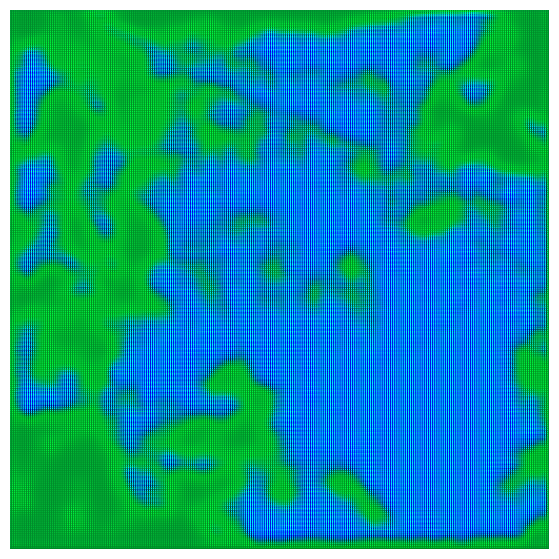

In [10]:
img = result[1].cpu()
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [11]:
result.shape

torch.Size([8, 3, 512, 512])

In [12]:
img.shape

torch.Size([3, 512, 512])

In [13]:
result[1]

tensor([[[-0.5636, -0.5375, -0.5882,  ..., -0.5409, -0.5717, -0.5274],
         [-0.5434, -0.5407, -0.5528,  ..., -0.5407, -0.5405, -0.5248],
         [-0.5967, -0.5505, -0.6411,  ..., -0.5547, -0.6102, -0.5305],
         ...,
         [-0.5407, -0.5412, -0.5468,  ..., -0.5429, -0.5311, -0.5276],
         [-0.5870, -0.5486, -0.6275,  ..., -0.5521, -0.5939, -0.5300],
         [-0.5249, -0.5278, -0.5233,  ..., -0.5299, -0.5191, -0.5265]],

        [[ 0.6104,  0.5450,  0.6585,  ...,  0.5456,  0.6398,  0.5448],
         [ 0.5916,  0.5530,  0.6252,  ...,  0.5577,  0.6103,  0.5492],
         [ 0.6509,  0.5471,  0.7284,  ...,  0.5500,  0.6998,  0.5466],
         ...,
         [ 0.5764,  0.5497,  0.6001,  ...,  0.5523,  0.5862,  0.5471],
         [ 0.6175,  0.5473,  0.6730,  ...,  0.5488,  0.6449,  0.5459],
         [ 0.5385,  0.5421,  0.5354,  ...,  0.5418,  0.5379,  0.5428]],

        [[ 0.1968,  0.1888,  0.1977,  ...,  0.1831,  0.1875,  0.1822],
         [ 0.2053,  0.1804,  0.2131,  ...,  0

In [14]:
img1 = downsample_image(batch, factor=4)
img1.shape

torch.Size([8, 3, 128, 128])

In [15]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[-8.5532e-01, -6.0459e-01,  1.7476e-02],
          [-3.1101e-01,  8.3946e-01, -4.7437e-01],
          [-1.1198e+00, -4.1662e-01, -1.1230e+00]],

         [[-6.6790e-01,  1.8739e+00,  6.6684e-01],
          [ 2.4694e-01,  1.6589e+00,  1.4938e+00],
          [-1.0096e+00,  2.2177e-01, -1.3140e-01]],

         [[-1.1791e-01,  8.8398e-01,  3.5469e-01],
          [ 2.2285e-01,  1.5122e+00,  1.0327e+00],
          [-1.1906e+00,  3.0362e-01,  4.0123e-01]]],


        [[[ 1.1316e-01,  2.8248e-01, -3.7855e-01],
          [ 7.1286e-01,  9.0462e-01, -2.1967e-01],
          [-5.1679e-01, -7.0431e-02, -1.4225e+00]],

         [[-1.3899e-01,  5.2438e-01, -3.3830e-01],
          [ 6.8611e-01,  9.2736e-01, -1.4053e-02],
          [-1.3682e+00, -8.8343e-01, -1.4521e+00]],

         [[-6.6282e-01,  3.8546e-01, -5.5739e-01],
          [ 1.1435e-01,  1.9307e-01, -5.4497e-01],
          [-2.0329e+00, -1.5274e+00, -2.4620e+00]]],


        [[[ 8.2239e-01,  3.6840e-01,  5.0854

In [16]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [17]:
batch.shape, result.shape

(torch.Size([8, 3, 512, 512]), torch.Size([8, 3, 512, 512]))

In [18]:
loss = loss_fn(result, batch.to(device))
loss

tensor(5560722.)

In [19]:
type(model)

my_upscale_model.UpscaleModel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

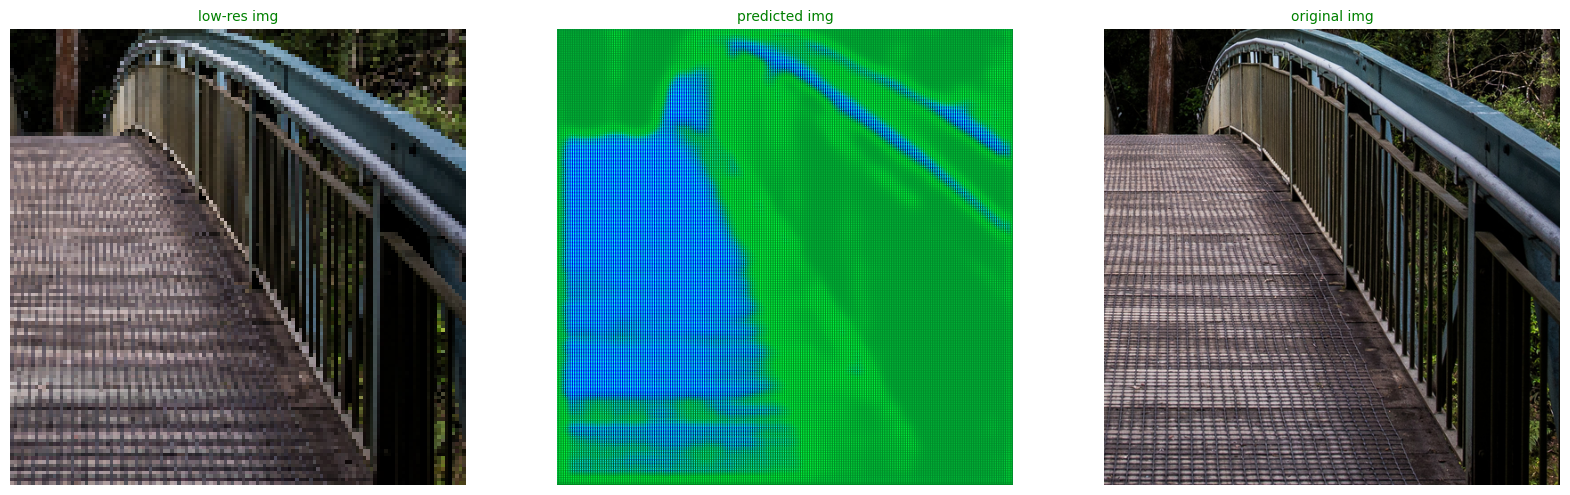

In [20]:
i = 3
y = batch[i]
y_pred = result[i]

# Plot predictions
plt.figure(figsize=(20, 18))
nrows = 1
ncols = 3

plt.subplot(nrows, ncols, 1)
plt.imshow(downsample_image(y.unsqueeze(dim=0), factor=4).squeeze().permute(1, 2, 0))
plt.title("low-res img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 2)
plt.imshow(y_pred.permute(1, 2, 0))
plt.title("predicted img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 3)
plt.imshow(y.permute(1, 2, 0))
plt.title("original img", fontsize=10, c="g") # green text if correct
plt.axis(False)

In [21]:
from vgg_loss import VGGLoss
vgg_loss_fn = VGGLoss(device="cpu")


f:\Programms\deep_learning\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
f:\Programms\deep_learning\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
some_loss = vgg_loss_fn.forward_demo(batch[i])
some_loss.shape

torch.Size([1, 512, 32, 32])

In [23]:
i=0
for param in vgg_loss_fn.vgg.parameters():
    print(param.shape)
    i+=1
i

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])


32

Original shape: torch.Size([32, 32]) -> [height, width]


(-0.5, 31.5, 31.5, -0.5)

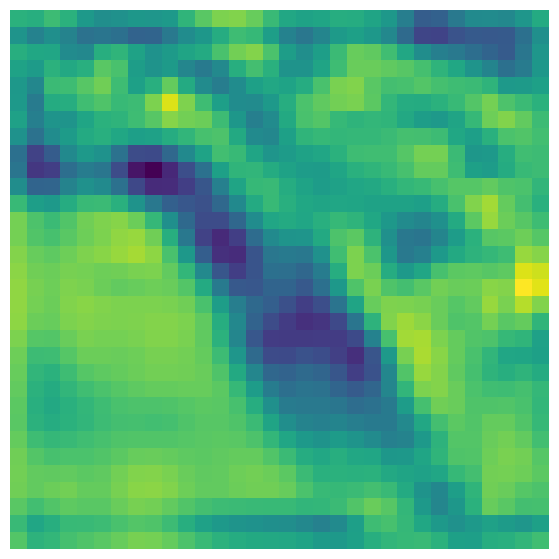

In [24]:
img = some_loss[0][11].cpu()

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")